In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input is voltage
L= 1e-3
R=0.05
Vmag=np.sqrt(2)*240
f=50
omega=2*np.pi*f
Tg=1e-6
t= np.arange(0,1,Tg)
v=Vmag*np.sin(omega*t)


In [3]:
T= 200e-6 # sampling period for 5 KHz frequency
n_samples= int(T/Tg)
t_samples=t[::n_samples]
v_samples=v[::n_samples]

In [4]:
i_samples=np.zeros(v_samples.size)
u= np.zeros(2)
y=np.zeros(2)


In [5]:
for v_index, v_val in np.ndenumerate(v_samples):
    u[0]= v_val
    y[0]= (T*u[0]+T*u[1]+2*L*y[1]-T*y[1]*R)/(2*L + T*R)
    u[1]= u[0]
    y[1]= y[0]
    i_samples[v_index]=y[0]

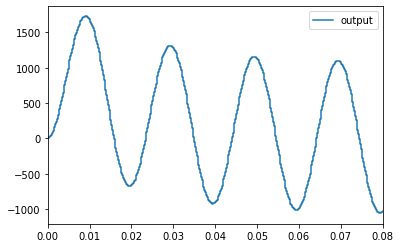

In [7]:
plt.figure()
plt.plot(t_samples,i_samples,label="output",ds="steps")
plt.xlim([0,0.08])
plt.legend()
plt.show()